## ⛵ Fish market 🐠
Database of common fish species for fish market 

### 0. Objective 🎯
1. Explore the dataset
1. Build a model to predict a continuous variable - **Weight**
1. Test the model 

### 1. Importing Libraries 📚

In [1]:
# Data Manipulation
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Models
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures
from xgboost import XGBRegressor

# Model Evaluation
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

c:\Users\Caio\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\compat.py:31: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


### 2. Data Dictionary 📃

+ **Species**: Species name of fish
+ **Weight**: Weight of fish in gram
+ **Length1**: Vertical length in cm
+ **Length2**: Diagonal length in cm
+ **Length3**: Cross length in cm
+ **Height**: Height in cm
+ **Width**: Diagonal width in cm

### 2.1 Reading Data 👀

In [2]:
data = pd.read_csv('data/Fish.csv')
data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [22]:
data.shape

(159, 7)

In [23]:
data.describe(percentiles=[0.01,0.99])

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
1%,6.364000,9.706000,10.206000,11.264000,1.874056,1.148400
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
99%,1571.000000,56.000000,60.000000,64.000000,18.685296,7.679758
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


When analyzing the data in the '**Weight**' column, we observe that 99% of the values fall within a specific range. However, the maximum value in the first row, which is 1650, is significantly higher than the rest of the data, which ranges from 1571. This discrepancy strongly suggests the presence of outliers in the dataset. 

Based on the information about the '**Weight**' column and the potential presence of outliers, let's create a distribution visualization to gain a better understanding of the data.

### 3. Data Vizualization 📊

### 3.1 Distribution of Weight 


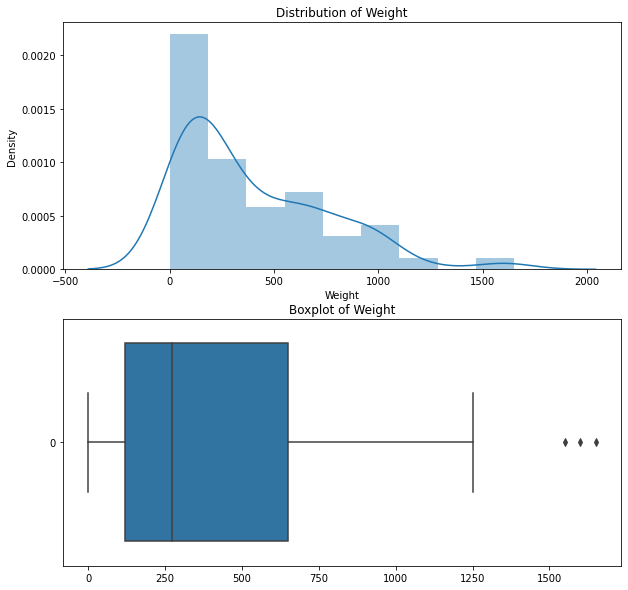

In [24]:
label = data['Weight']

fig, ax = plt.subplots(2,1, figsize=(10,10))

sns.distplot(label, ax=ax[0])
ax[0].set_title('Distribution of Weight')

sns.boxplot(label, ax=ax[1], orient='h')
ax[1].set_title('Boxplot of Weight')

plt.show()

Upon examining the box plot, we can easily identify the outliers, which are data points that lie far from the central distribution. These outliers have the potential to negatively impact the performance and accuracy of our predictive model.<br>To ensure a robust and reliable model, it is advisable to remove these outliers from the dataset.

### 3.2 Removing Outliers


In [25]:
Q1 = data['Weight'].quantile(0.25)
Q3 = data['Weight'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data = data[(data['Weight'] >= lower_bound) & (data['Weight'] <= upper_bound)]

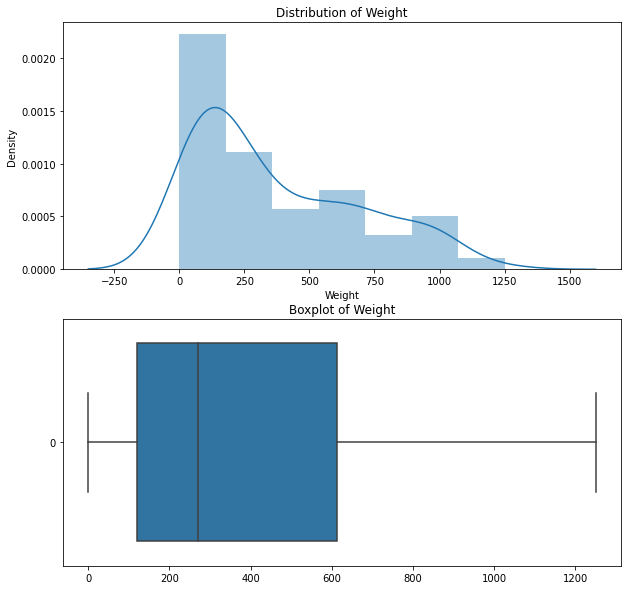

In [26]:
label = data['Weight']

fig, ax = plt.subplots(2,1, figsize=(10,10))

sns.distplot(label, ax=ax[0])
ax[0].set_title('Distribution of Weight')

sns.boxplot(label, ax=ax[1], orient='h')
ax[1].set_title('Boxplot of Weight')

plt.show()

### 3.3 Pair PLot

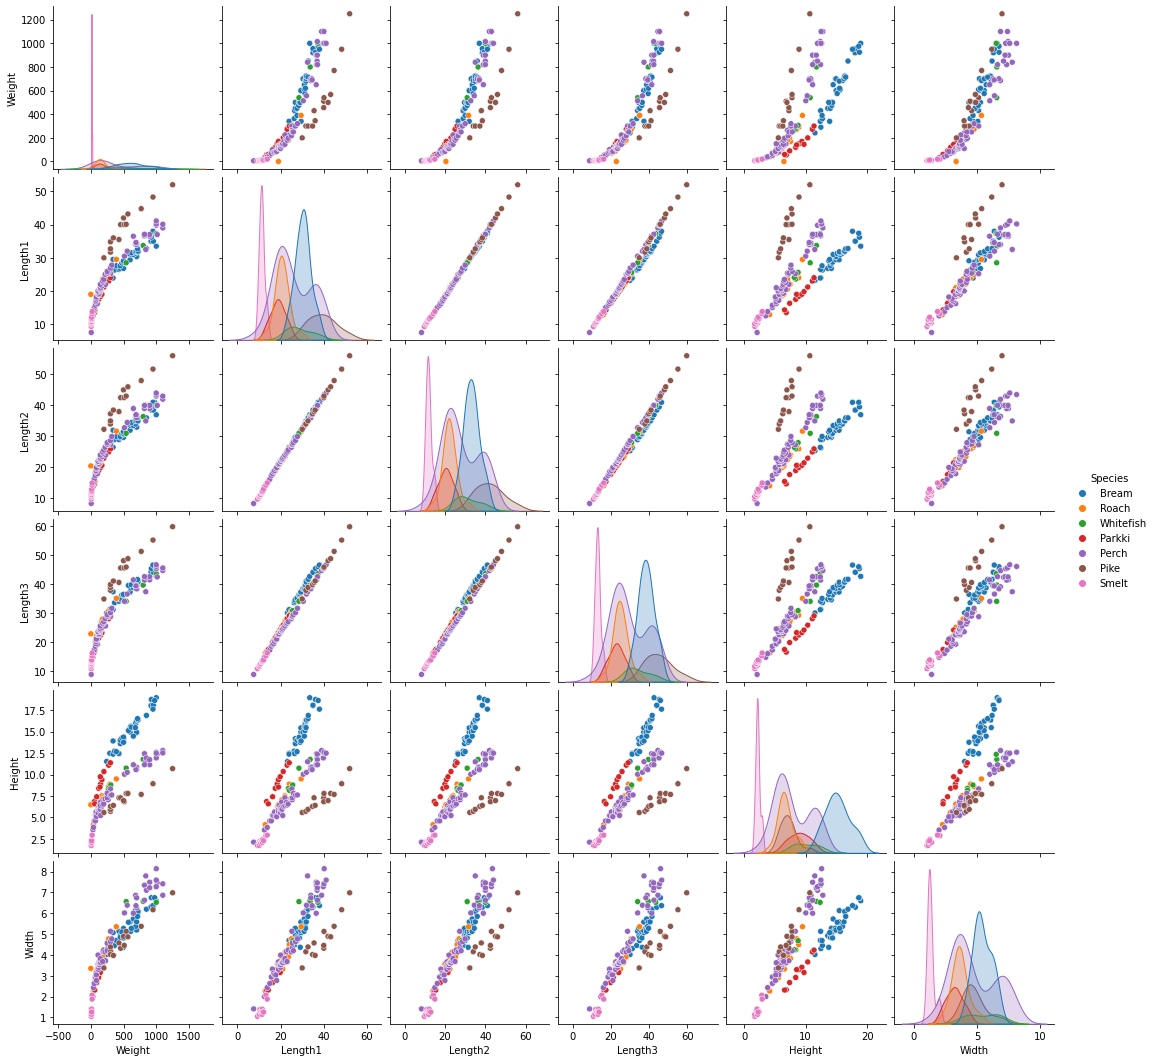

In [27]:
sns.pairplot(data, hue='Species')

### 3.4 Distribution of all other variables

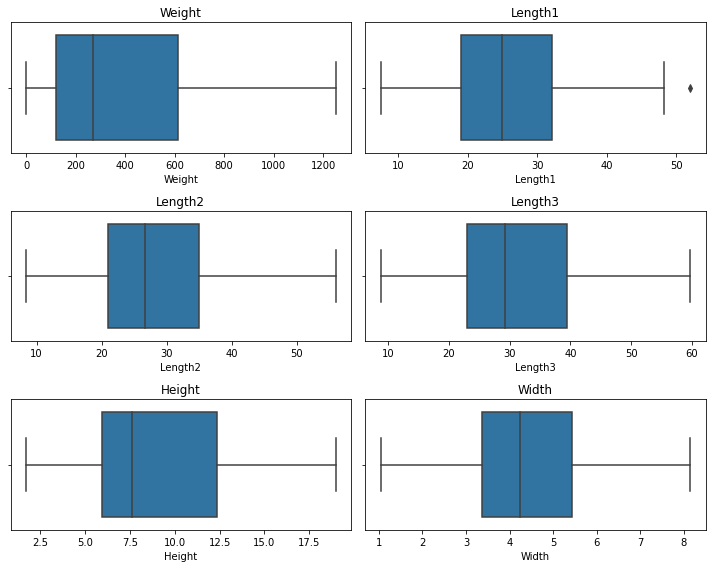

In [28]:
columns_of_interest = data.iloc[:,1:]

fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(10, 8))
for i, col in enumerate(columns_of_interest):
    sns.boxplot(x=col, data=data, ax=ax[i//2][i%2])
    ax[i//2][i%2].set_title(col)

plt.tight_layout()
plt.show()

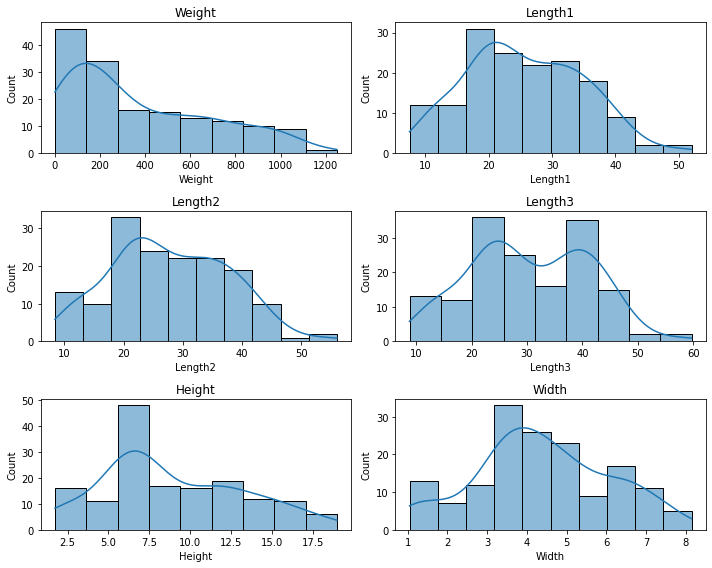

In [29]:
columns_of_interest = data.iloc[:,1:]

fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(10, 8))
for i, col in enumerate(columns_of_interest):
    sns.histplot(data[col], ax=ax[i//2][i%2], kde=True)
    ax[i//2][i%2].set_title(col)

plt.tight_layout()
plt.show()

### 3.5 Correlation Matriz

<AxesSubplot: >

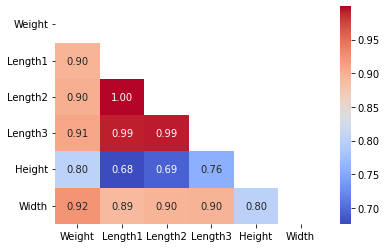

In [30]:
corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, fmt='.2f', cmap='coolwarm')

### 4. Separating the dataset between train and test data 

In [31]:
from sklearn.model_selection import train_test_split

X = data.iloc[:, 1:7]
y = data['Weight']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=80)

### 5. Creating Model 🤖

In [32]:
poly = PolynomialFeatures(degree=2) 
poly_regression = LinearRegression()

models = {
    'Linear Regression': LinearRegression(),
    'KNN': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'SVM': SVR(),
    'Polynomial Regression': poly_regression,
    'XGBoost': XGBRegressor(),
}

sample = []

for key, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    n = len(y_test) 
    p = X_test.shape[1]  
    mse = mean_squared_error(y_test, y_pred) # Cálculo do MSE
    r2 = r2_score(y_test, y_pred) # Cálculo do R²
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)  # Cálculo do R² ajustado
    mae = mean_absolute_error(y_test, y_pred) # Cálculo do MAE
    cv_score = cross_val_score(model, X_train, y_train, cv=5).mean() # Cálculo do CV

    sample.append([key, r2, adj_r2, mae,np.sqrt(mse), cv_score]) # Adiciona os resultados na lista

models_df = pd.DataFrame(sample, columns=['Model', 'R2', 'Adjusted R2', 'MAE','RMSE', 'Cross Validation Score'])


In [33]:
models_df.sort_values(by='R2', ascending=False)

,Model,R2,Adjusted R2,MAE,RMSE,Cross Validation Score
0,Linear Regression,1.000000,1.000000,3.399290e-14,5.201246e-14,1.000000
6,Polynomial Regression,1.000000,1.000000,3.399290e-14,5.201246e-14,1.000000
7,XGBoost,0.998723,0.998531,6.294210e+00,1.247319e+01,0.992214
4,Gradient Boosting,0.998569,0.998355,6.047398e+00,1.320211e+01,0.990760
1,KNN,0.997180,0.996757,1.055957e+01,1.853585e+01,0.991153
3,Random Forest,0.996577,0.996063,1.114177e+01,2.042058e+01,0.990610
2,Decision Tree,0.994887,0.994120,1.588298e+01,2.495633e+01,0.985695
5,SVM,0.047353,-0.095544,2.661747e+02,3.406634e+02,-0.016157


Upon analyzing the DataFrame "Models," it becomes evident that linear regression outperforms other models, displaying superior metrics. The evaluation of various machine learning algorithms on the dataset reveals that linear regression achieves the most favorable results when compared to other models.

### 6. Final Model

MSE: 2.7052956737442917e-27
RMSE: 5.201245690932406e-14
R2: 1.0


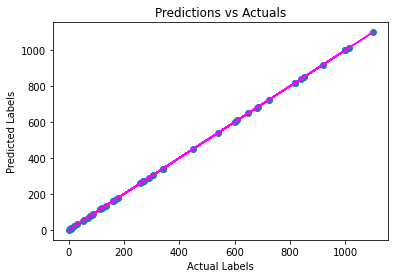

In [34]:
model = LinearRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, y_pred)
print("R2:", r2)

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Predictions vs Actuals')
z = np.polyfit(y_test, y_pred, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

### 7. Using the Trained Model to new data

In [35]:
import joblib

# Save the model as a pickle file
filename = './fish_model.pkl'
joblib.dump(model, filename)

# Load the model from the file
loaded_model = joblib.load(filename)

In [36]:
X_new = np.array([[140.0,25.0,27.0,28.5,10.8750,8.5250],
                  [120.0,10.0,54.0,10.5,12.8750,10.5250]]) 

# Use the model to predict Weight values
results = loaded_model.predict(X_new)
print('Predictions:')
for prediction in results:
    print(f'Weight: {round(prediction,2)}')

Predictions:
Weight: 140.0
Weight: 120.0
